### **Tham khảo:**
https://github.com/ThorPham/Machine-learning/blob/master/Nhan%20dang%20bien%20so%20xe(post%20tr%C3%AAn%20web).ipynb
https://thorpham.github.io/blog/2018/04/11/regconite-plate-car/

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:

im = cv2.imread("/content/gdrive/My Drive/app/regconite-plate-car/project1/car2.jpg")
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# lọc nhiễu bằng bilateralFilter mục đích lọc này là làm tăng strengt cho edge trên image
noise_removal = cv2.bilateralFilter(im_gray,9,75,75)
# Cân bằng lại histogram của ảnh 
equal_histogram = cv2.equalizeHist(noise_removal)
#  Morphogoly open mục đích là làm tăng dilation của edge và giảm edge nhiễu
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel1,iterations=20)
# subtract image
sub_morp_image = cv2.subtract(equal_histogram,morph_image)
# dùng threshold OSTU
ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
# Dùng canny
canny_image = cv2.Canny(thresh_image,250,255)
# dilation
kernel2= np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(canny_image,kernel2)
#
new,contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
    if len(approx) == 4:
            screenCnt = approx
            break
#final = cv2.drawContours(im, [screenCnt], -1, (0, 255, 0), 3)

(-0.5, 1999.5, 1334.5, -0.5)

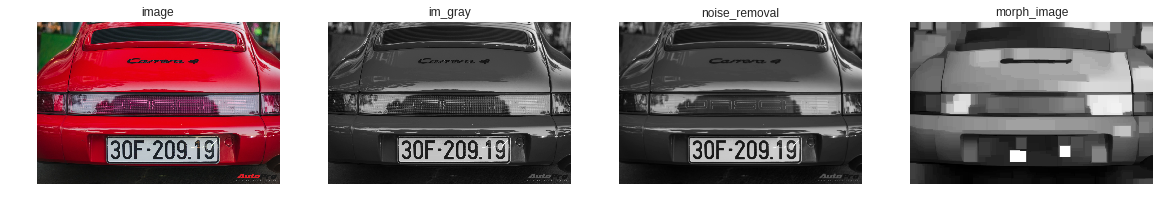

In [65]:

plt.subplots(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.title("image")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(im_gray,cmap="gray")
plt.title("im_gray")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(noise_removal,cmap="gray")
plt.title("noise_removal")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(morph_image,cmap="gray")
plt.title("morph_image")
plt.axis('off')

(-0.5, 1999.5, 1334.5, -0.5)

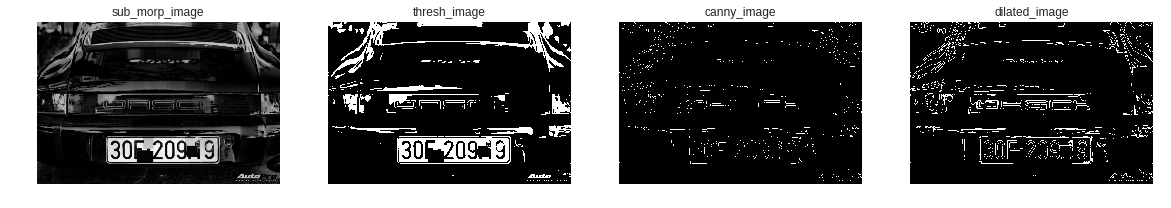

In [66]:
plt.subplots(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(sub_morp_image,cmap="gray")
plt.title("sub_morp_image")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(thresh_image,cmap="gray")
plt.title("thresh_image")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(canny_image,cmap="gray")
plt.title("canny_image")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(dilated_image,cmap="gray")
plt.title("dilated_image")
plt.axis('off')

In [67]:
(x,y,w,h) = cv2.boundingRect(screenCnt)
roi = im[y:y+h,x:x+w]
roi1 = roi.copy()
cv2.rectangle(roi,(x,y),(x+w,y+h),(0,255,0),1)

array([[[12,  8, 50],
        [13,  9, 50],
        [13,  9, 50],
        ...,
        [34, 33, 89],
        [34, 33, 89],
        [35, 34, 90]],

       [[13,  9, 51],
        [12,  8, 49],
        [12,  8, 49],
        ...,
        [35, 34, 90],
        [34, 33, 89],
        [34, 33, 89]],

       [[13,  9, 51],
        [11,  7, 48],
        [12,  8, 49],
        ...,
        [34, 33, 89],
        [33, 32, 88],
        [32, 31, 87]],

       ...,

       [[14,  3, 76],
        [15,  3, 75],
        [15,  4, 74],
        ...,
        [12,  1, 94],
        [ 9,  1, 96],
        [ 8,  0, 95]],

       [[14,  2, 78],
        [16,  3, 79],
        [16,  3, 77],
        ...,
        [13,  2, 94],
        [10,  5, 90],
        [ 8,  3, 88]],

       [[14,  2, 78],
        [17,  4, 78],
        [16,  3, 77],
        ...,
        [14,  2, 92],
        [10,  4, 86],
        [ 7,  1, 83]]], dtype=uint8)

(-0.5, 936.5, 230.5, -0.5)

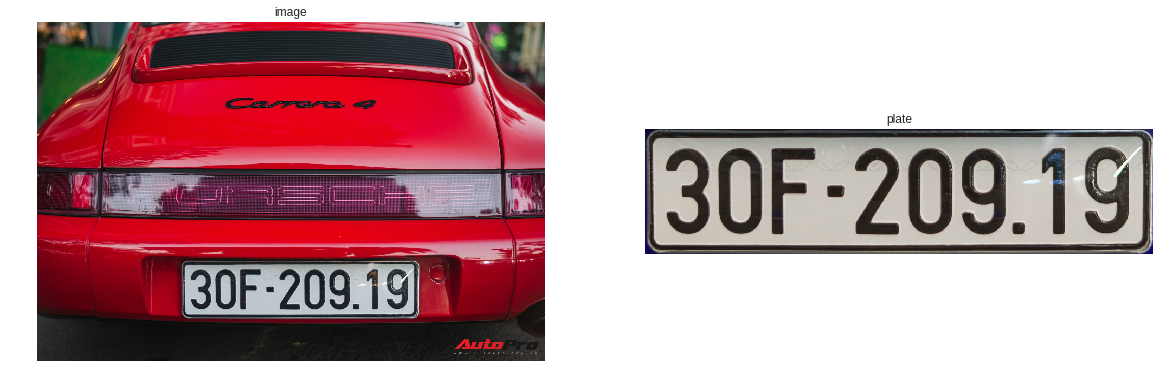

In [68]:
plt.subplots(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.title("image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(roi,cmap="gray")
plt.title("plate")
plt.axis('off')

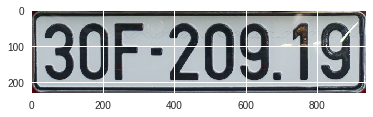

In [69]:
plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

In [0]:
roi_gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
roi_blur = cv2.GaussianBlur(roi_gray,(3,3),1)

In [0]:
ret,thre = cv2.threshold(roi_blur,120,255,cv2.THRESH_BINARY_INV)
#cany = cv2.Canny(thre,250,255)

In [0]:
kerel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
thre_mor = cv2.morphologyEx(thre,cv2.MORPH_DILATE,kerel3)

In [0]:
_,cont,hier = cv2.findContours(thre_mor,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#dr = cv2.drawContours(roi1,cont,-1,(0,255,0))

In [74]:
len(cont)

44

In [0]:
areas_ind = {}
areas = []
for ind,cnt in enumerate(cont) :
    area = cv2.contourArea(cnt)
    areas_ind[area] = ind
    areas.append(area)

In [76]:
areas = sorted(areas,reverse=True)[2:9]
areas

[11594.0, 11488.0, 9913.0, 7995.5, 6555.0, 6499.5, 5687.5]

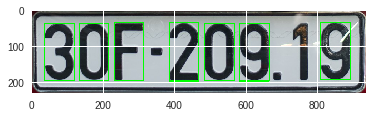

In [77]:

for i in areas:
    (x,y,w,h) = cv2.boundingRect(cont[areas_ind[i]])
    cv2.rectangle(roi,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

In [0]:
character = []
for i in areas:
    (x,y,w,h) = cv2.boundingRect(cont[areas_ind[i]])
    image = roi[y:y+h,x:x+w]
    character.append(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

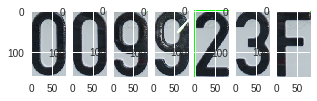

In [80]:

plt.subplots(figsize=(5,5))
plt.subplot(1,7,1)
plt.imshow(character[0])
plt.subplot(1,7,2)
plt.imshow(character[1])
plt.subplot(1,7,3)
plt.imshow(character[2])
plt.subplot(1,7,4)
plt.imshow(character[3])
plt.subplot(1,7,5)
plt.imshow(character[4])
plt.subplot(1,7,6)
plt.imshow(character[5])
plt.subplot(1,7,7)
plt.imshow(character[6])